In [2]:
import torch as T
import torch.nn as N
import torch.optim as O

from tqdm import tqdm # for progressbar
import matplotlib.pyplot as plt

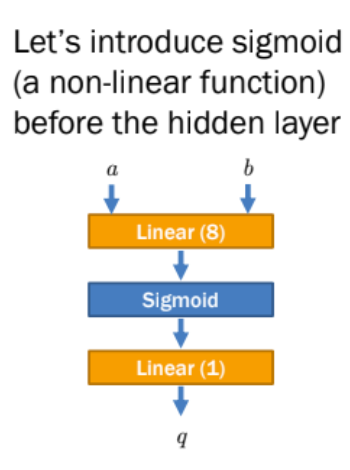

In [9]:
dim_input = 2
dim_hidden = 8
dim_output = 1

xor_model = N.Sequential(
    N.Linear(dim_input, dim_hidden),
    N.Sigmoid(),
    #N.ReLU(),
    N.Linear(dim_hidden, dim_output)
)

print('xor_model =\n{}'.format(xor_model))

xor_model =
Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


## Generating the Training Data
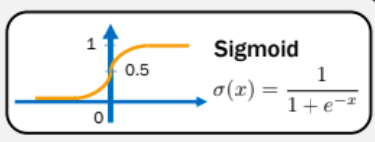


In [10]:
import random
no_samples = 1000
training_data = []
for i in range(no_samples):
    # input features: random integer == 1 then True else False
    a = (random.randint(0, 1) == 1)
    b = (random.randint(0, 1) == 1)
    q = (a != b)
    input_features = (a, b)
    output_class = q
    training_data.append((input_features, output_class))

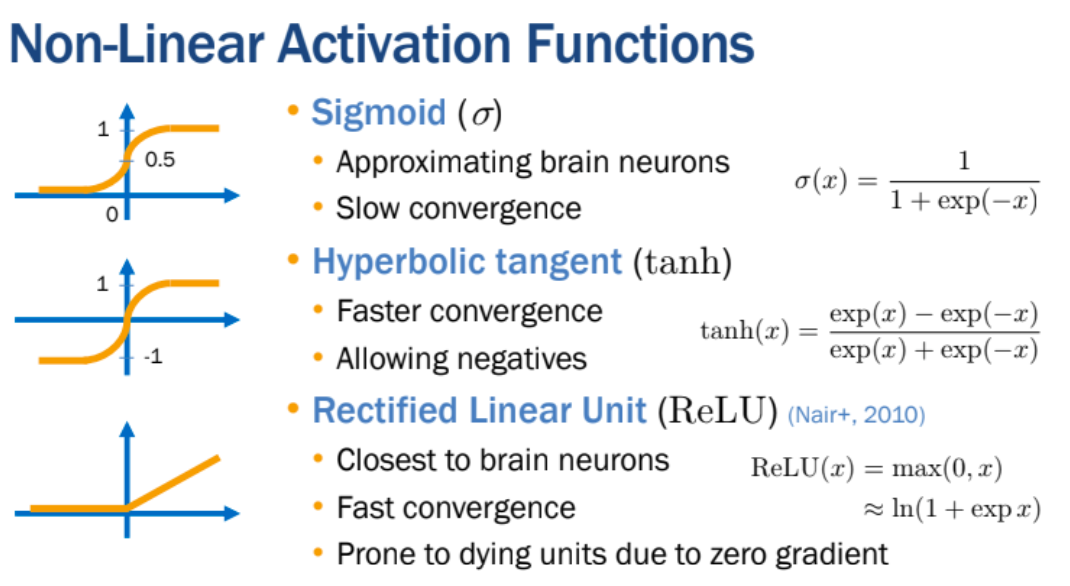

## Generating the Testing Data


In [11]:
no_testing = 100
testing_data = []
for i in range(no_testing):
    a = (random.randint(0, 1) == 1)
    b = (random.randint(0, 1) == 1)
    q = (a != b)
    input_features = (a, b)
    output_class = q
    testing_data.append((input_features, output_class))

## Training

In [12]:
no_epochs = 40
loss_fn = N.MSELoss() # marginal squared error
learning_rate = 0.01
optimizer = O.SGD(xor_model.parameters(), lr=learning_rate)
loss_history = []
for i in tqdm(range(no_epochs)):
    total_loss = 0.0
    for (input_features, output_class) in training_data:
        ((a, b), q) = (input_features, output_class)
        
        # 1. Convert your training data into input and output vectors (x and y)
        x = T.zeros(dim_input) # input vector
        y = T.zeros(dim_output) # desired output class
        if a: x[0] = 1.0
        if b: x[1] = 1.0
        if q: y[0] = 1.0
        
        # 2. Feed x to the model to obtain a prediction
        prediction = xor_model(x)

        # 3. Calculate the loss between y and the prediction
        loss = loss_fn(prediction, y)
        total_loss += loss.item() # get the loss value
        
        # 4. Do backpropagation w.r.t. the loss and tune the model parameters        
        optimizer.zero_grad() # clear gradient cache
        loss.backward() # perform backpropagation
        optimizer.step() # tune the model parameters
        
    loss_history.append(total_loss / no_samples)

100%|██████████| 40/40 [00:12<00:00,  3.20it/s]


## Visualizing the Loss History (Convert very fast)

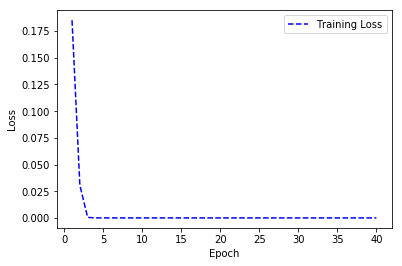

In [13]:
epoch_count = range(1, no_epochs + 1)
plt.plot(epoch_count, loss_history, 'b--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Testing

In [14]:
no_correct = 0.0
for (input_features, output_class) in testing_data:
    ((a, b), q) = (input_features, output_class)
    # 1. Convert your training data into input and output vectors (x and y)
    x = T.zeros(dim_input) # dim_input = 2
    if a: x[0] = 1.0
    if b: x[1] = 1.0
    
    # 2. Feed x to the model to obtain a prediction
    pred = xor_model(x)
    
    # 3. If the prediction is correct w.r.t. y, increase the number of correct prediction   
    pred_class = True if pred [0] >= 0.5 else False
    result = (pred_class == q)
    if result: no_correct += 1
    print('{:>5} XOR {:>5} = {:>5} | prediction = {:>5} | {:>5}'.format(
        str(a), str(b), str(q), str(pred_class), str(result))
    )
accuracy = 100 * no_correct / no_testing
print('Accuracy = {}'.format(accuracy))

 True XOR False =  True | prediction =  True |  True
False XOR  True =  True | prediction =  True |  True
 True XOR  True = False | prediction = False |  True
False XOR False = False | prediction = False |  True
False XOR False = False | prediction = False |  True
False XOR False = False | prediction = False |  True
False XOR  True =  True | prediction =  True |  True
False XOR  True =  True | prediction =  True |  True
False XOR False = False | prediction = False |  True
 True XOR  True = False | prediction = False |  True
 True XOR  True = False | prediction = False |  True
 True XOR  True = False | prediction = False |  True
 True XOR  True = False | prediction = False |  True
False XOR False = False | prediction = False |  True
 True XOR False =  True | prediction =  True |  True
False XOR  True =  True | prediction =  True |  True
 True XOR  True = False | prediction = False |  True
False XOR  True =  True | prediction =  True |  True
False XOR False = False | prediction = False |